In [13]:
import pystac_client
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# Load in Estancias Coords

In [14]:
import geopandas as gpd
estancias = gpd.read_file("Estancias_corrals_from_sat_imagery")
type(estancias)

geopandas.geodataframe.GeoDataFrame

In [15]:
#indexing operations convert geopandas dataframe to vanilla pandas dataframe
#so we need to store the crs in a variable to access it later
estancias_crs = estancias.crs
estancias_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
estancias = estancias[['fid','locus_type','lat','lon']].dropna().reset_index()
estancias

,index,fid,locus_type,lat,lon
0,3,4.0,6.0,-16.910967,-70.644626
1,4,5.0,6.0,-17.040630,-69.742321
2,5,6.0,13.0,-17.310982,-69.975398
3,6,7.0,13.0,-15.070609,-73.132203
4,7,8.0,13.0,-15.070327,-73.116103
...,...,...,...,...,...
9535,9538,9539.0,6.0,-16.095296,-70.985209
9536,9539,9540.0,6.0,-16.096054,-70.974107
9537,9540,9541.0,6.0,-15.147478,-73.133663
9538,9541,9542.0,6.0,-15.229275,-73.143675


In [17]:
max(estancias['lat'])

-14.780132509192285

# Load in Assets

In [185]:
import odc.stac
import hs_geofuncs as hsg

point = {"type": "Point", "coordinates": [-73.132203, -15.070609]}

In [186]:
item, asset = hsg.fetch_asset("cop-dem-glo-30", "data", point, None, estancias_crs)
asset = asset.squeeze()

In [187]:
asset

<xarray.Dataset>
Dimensions:      (lon: 3601, lat: 3601)
Coordinates:
  * lon          (lon) float64 -74.0 -74.0 -74.0 -74.0 ... -73.0 -73.0 -73.0
  * lat          (lat) float64 -15.0 -15.0 -15.0 -15.0 ... -16.0 -16.0 -16.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Data variables:
    data         (lat, lon) float32 3.371e+03 3.377e+03 ... 1.719e+03 1.699e+03

In [188]:
np.where(asset['lat'] > -15.070609)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [191]:
np.where(asset['lon'] > -73.132203)

(array([3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135,
        3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146,
        3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157,
        3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168,
        3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179,
        3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190,
        3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201,
        3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212,
        3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223,
        3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234,
        3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245,
        3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256,
        3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267,
        3268, 3269, 3270, 3271, 3272, 

In [192]:
dem_around_pt = asset.data[253:258,3123:3128]

In [198]:
dem_around_pt['lon']

<xarray.DataArray 'lon' (lon: 5)>
array([-73.132639, -73.132361, -73.132083, -73.131806, -73.131528])
Coordinates:
  * lon          (lon) float64 -73.13 -73.13 -73.13 -73.13 -73.13
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    axis:           X
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [194]:
grad_x,grad_y = np.gradient(dem_around_pt)

In [195]:
grad_x

array([[-0.22363281,  1.1303711 ,  1.6162109 ,  2.7285156 ,  2.4941406 ],
       [-1.4123535 ,  1.2700195 ,  2.5561523 ,  2.5871582 ,  2.9475098 ],
       [-2.1433105 ,  0.7468262 ,  3.3381348 ,  3.536377  ,  3.6757812 ],
       [-1.6984863 , -0.48095703,  2.0947266 ,  3.9106445 ,  4.2373047 ],
       [-1.7114258 , -1.0458984 ,  1.0092773 ,  3.194336  ,  4.523926  ]],
      dtype=float32)

In [196]:
grad_y

array([[-0.33642578, -0.46899414,  0.24414062,  0.9736328 ,  0.8574219 ],
       [ 1.0175781 ,  0.45092773,  1.0432129 ,  1.4125977 ,  0.6230469 ],
       [ 5.0283203 ,  3.4995117 ,  1.5612793 ,  1.3649902 ,  1.578125  ],
       [ 6.7978516 ,  5.932373  ,  3.8327637 ,  1.7502441 ,  0.90185547],
       [ 7.463379  ,  7.2927246 ,  5.952881  ,  3.5075684 ,  2.2314453 ]],
      dtype=float32)

In [197]:
np.sqrt(grad_x**2 + grad_y**2)

array([[0.4039727, 1.2238032, 1.6345465, 2.8970258, 2.6374059],
       [1.7407491, 1.3476963, 2.7608347, 2.9476805, 3.0126402],
       [5.4660573, 3.578314 , 3.685205 , 3.7906675, 4.000231 ],
       [7.0068283, 5.9518375, 4.367832 , 4.284448 , 4.332216 ],
       [7.6570883, 7.3673425, 6.0378337, 4.744135 , 5.0443287]],
      dtype=float32)

In [149]:
asset.sel({"lon":-73.132203,"lat":-15.070609},method = "nearest")['data'].item()

4517.37109375

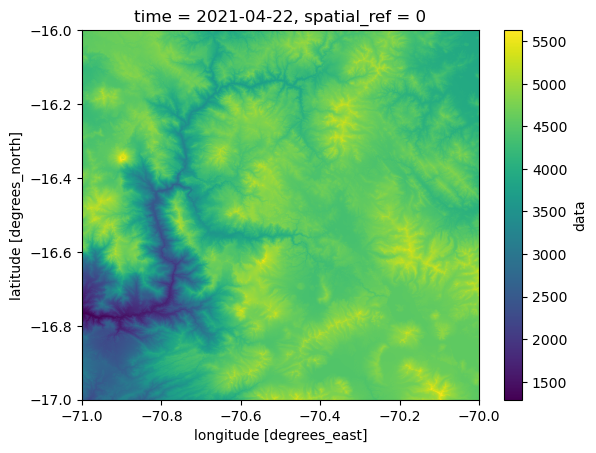

In [23]:
asset.data.plot.imshow()

In [25]:
asset.data.max()

<xarray.DataArray 'data' ()>
array(5632.13720703)
Coordinates:
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

In [26]:
import xarray as xr
import numpy as np
import xrspatial

In [32]:
asset.data

<xarray.DataArray 'data' (lat: 3601, lon: 3601)>
array([[      nan, 4546.1523, 4545.85  , ..., 3894.349 , 3894.6357,
        3894.5864],
       [      nan, 4545.755 , 4545.3525, ..., 3894.8315, 3894.754 ,
        3894.4646],
       [      nan, 4545.3486, 4544.7285, ..., 3894.7292, 3894.7495,
        3895.0723],
       ...,
       [      nan, 2562.2283, 2564.085 , ..., 4545.3994, 4543.836 ,
        4542.376 ],
       [      nan, 2566.692 , 2571.548 , ..., 4546.976 , 4545.617 ,
        4543.777 ],
       [      nan, 2587.1396, 2587.255 , ..., 4548.521 , 4547.129 ,
        4545.32  ]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
  * lat          (lat) float64 -16.0 -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38

In [31]:
aspects = xrspatial.aspect(asset.data)[1:-1,1:-1]

In [33]:
aspects.pad(lon = (1,1),lat = (1,1))

<xarray.DataArray 'aspect' (lat: 3601, lon: 3601)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan, 150.37625  , ...,   1.4480425,
          7.9939485,         nan],
       [        nan,         nan, 155.63551  , ..., 348.37958  ,
        350.79663  ,         nan],
       ...,
       [        nan,         nan, 254.59517  , ...,  43.170856 ,
         41.991398 ,         nan],
       [        nan,         nan, 335.7012   , ...,  44.23161  ,
         44.9358   ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lon          (lon) float64 nan -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0 nan
  * lat          (lat) float64 nan -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0 nan
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

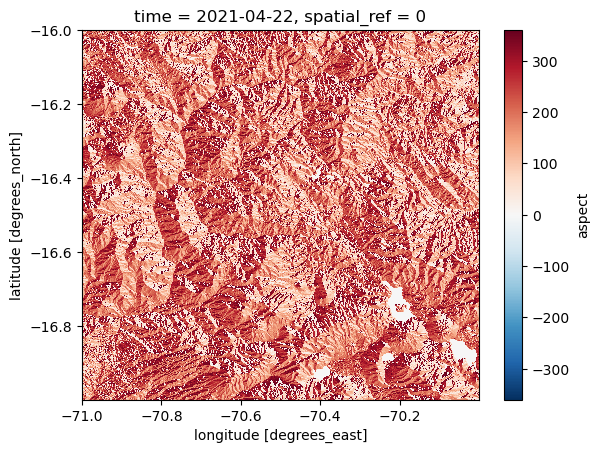

In [35]:
aspects.plot.imshow()

In [39]:
tgt_lat = xr.DataArray(estancias['lat'], dims="points")
tgt_lon = xr.DataArray(estancias['lon'], dims="points")
asps = aspects.sel(lat = tgt_lat,lon = tgt_lon, method = "nearest")

In [40]:
np.sum(aspects.isnull())

<xarray.DataArray 'aspect' ()>
array(3599)
Coordinates:
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

In [41]:
in_bds_pts = (estancias["lat"] < -16) & (estancias["lat"] > -17)\
             & (estancias["lon"]<-70) & (estancias["lon"]>-71)

In [42]:
len(asps)

9540

In [43]:
np.sum(in_bds_pts)

1519

In [44]:
estancias[~asps.isnull().to_pandas()]

,index,fid,locus_type,lat,lon
0,3,4.0,6.0,-16.910967,-70.644626
1,4,5.0,6.0,-17.040630,-69.742321
2,5,6.0,13.0,-17.310982,-69.975398
5,8,9.0,13.0,-15.914387,-70.730906
6,9,10.0,13.0,-15.324966,-70.882605
...,...,...,...,...,...
9521,9524,9525.0,13.0,-17.309039,-69.462043
9534,9537,9538.0,6.0,-16.096173,-70.999525
9535,9538,9539.0,6.0,-16.095296,-70.985209
9536,9539,9540.0,6.0,-16.096054,-70.974107


In [45]:
estancias[asps.isnull().to_pandas()]

,index,fid,locus_type,lat,lon
3,6,7.0,13.0,-15.070609,-73.132203
4,7,8.0,13.0,-15.070327,-73.116103
7,10,11.0,6.0,-15.391845,-71.002209
8,11,12.0,13.0,-15.421719,-71.297523
9,12,13.0,13.0,-15.616308,-72.547838
...,...,...,...,...,...
9531,9534,9535.0,6.0,-15.038533,-72.865356
9532,9535,9536.0,6.0,-15.013124,-72.878173
9533,9536,9537.0,6.0,-14.952795,-72.979597
9537,9540,9541.0,6.0,-15.147478,-73.133663


In [46]:
len(estancias)

9540

In [47]:
~asps.isnull().to_pandas()

points
0        True
1        True
2        True
3       False
4       False
        ...  
9535     True
9536     True
9537    False
9538    False
9539     True
Length: 9540, dtype: bool

<xarray.DataArray 'aspect' (lat: 3599, lon: 3599)>
array([[        nan, 150.37625  , 165.8251   , ...,  49.337933 ,
          1.4480425,   7.9939485],
       [        nan, 155.63551  , 176.43166  , ...,   5.130447 ,
        348.37958  , 350.79663  ],
       [        nan, 162.15997  , 165.8382   , ...,  20.038698 ,
        252.10736  , 217.6556   ],
       ...,
       [        nan, 159.67175  , 165.73369  , ...,  43.094654 ,
         44.51517  ,  41.63099  ],
       [        nan, 254.59517  , 325.04028  , ...,  43.821445 ,
         43.170856 ,  41.991398 ],
       [        nan, 335.7012   , 327.63315  , ...,  45.723656 ,
         44.23161  ,  44.9358   ]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
  * lat          (lat) float64 -16.0 -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38

In [49]:
aspects.lon

<xarray.DataArray 'lon' (lon: 3599)>
array([-70.999861, -70.999583, -70.999306, ..., -70.000972, -70.000694,
       -70.000417])
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    axis:           X
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [50]:
import numpy as np

In [52]:
np.gradient(asset.data)

[array([[        nan, -0.39746094, -0.4975586 , ...,  0.48242188,
          0.11816406, -0.12182617],
        [        nan, -0.40185547, -0.560791  , ...,  0.19006348,
          0.05688477,  0.24291992],
        [        nan, -0.52001953, -0.36645508, ...,  0.15356445,
          0.28808594,  0.35290527],
        ...,
        [        nan, -6.270996  , -1.6347656 , ...,  1.7280273 ,
          1.7150879 ,  1.4863281 ],
        [        nan, 12.455688  , 11.584961  , ...,  1.560791  ,
          1.6464844 ,  1.4719238 ],
        [        nan, 20.447754  , 15.706787  , ...,  1.5449219 ,
          1.5117188 ,  1.5429688 ]], dtype=float32),
 array([[        nan,         nan, -0.39697266, ...,  0.04382324,
          0.11865234, -0.04931641],
        [        nan,         nan, -0.17895508, ..., -0.01306152,
         -0.18347168, -0.28930664],
        [        nan,         nan, -0.26464844, ..., -0.03210449,
          0.17150879,  0.3227539 ],
        ...,
        [        nan,         nan,  4.4

In [65]:
asset.data['lat'].data[1:] - asset.data['lat'].data[:-1]

array([-0.00027778, -0.00027778, -0.00027778, ..., -0.00027778,
       -0.00027778, -0.00027778])

In [64]:
asset.data.data

array([[      nan, 4546.1523, 4545.85  , ..., 3894.349 , 3894.6357,
        3894.5864],
       [      nan, 4545.755 , 4545.3525, ..., 3894.8315, 3894.754 ,
        3894.4646],
       [      nan, 4545.3486, 4544.7285, ..., 3894.7292, 3894.7495,
        3895.0723],
       ...,
       [      nan, 2562.2283, 2564.085 , ..., 4545.3994, 4543.836 ,
        4542.376 ],
       [      nan, 2566.692 , 2571.548 , ..., 4546.976 , 4545.617 ,
        4543.777 ],
       [      nan, 2587.1396, 2587.255 , ..., 4548.521 , 4547.129 ,
        4545.32  ]], dtype=float32)

In [155]:
diffs = (asset.data['lat'].data[1:] - asset.data['lat'].data[:-1])

In [156]:
max(diffs)

-0.000277777777776933

In [70]:
min(diffs)

-0.0002777777777787094

In [74]:
mini_dem = asset.data.data[1:4,1:4]

In [81]:
(mini_dem[2,1] - mini_dem[0,1]) / 2

-0.366455078125

In [75]:
np.gradient(mini_dem)

[array([[-0.40625   , -0.62402344, -0.5776367 ],
        [-0.52001953, -0.36645508, -0.3659668 ],
        [-0.63378906, -0.10888672, -0.15429688]], dtype=float32),
 array([[-0.40234375, -0.17895508,  0.04443359],
        [-0.6201172 , -0.26464844,  0.09082031],
        [-0.09521484, -0.02490234,  0.04541016]], dtype=float32)]

AttributeError: module 'numpy' has no attribute 'grad'

In [101]:
def add_aspect(asset, dem_band='data'):
    aspects = xrspatial.aspect(asset[dem_band].squeeze())[1:-1,1:-1]
    aspects.pad(lon = (1,1),lat = (1,1))
    asset['aspect'] = aspects
    return(asset)

In [105]:
def add_grade(asset, dem_band='data'):
    grad_x,grad_y = np.gradient(asset[dem_band].squeeze())
    grad = np.sqrt(grad_x**2 + grad_y**2)
    asset['grade_lon'] = (['lon','lat'],grad_x)
    asset['grade_lat'] = (['lon','lat'],grad_y)
    asset['grade'] = (['lon','lat'],grad)
    return(asset)

In [110]:
np.arctan(1) * 180 / np.pi

45.0

In [116]:
asps = np.arctan2(asset.grade_y, asset.grade_x) * 180 / np.pi

In [117]:
asps.max()

<xarray.DataArray 'grade_y' ()>
array(180.)
Coordinates:
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

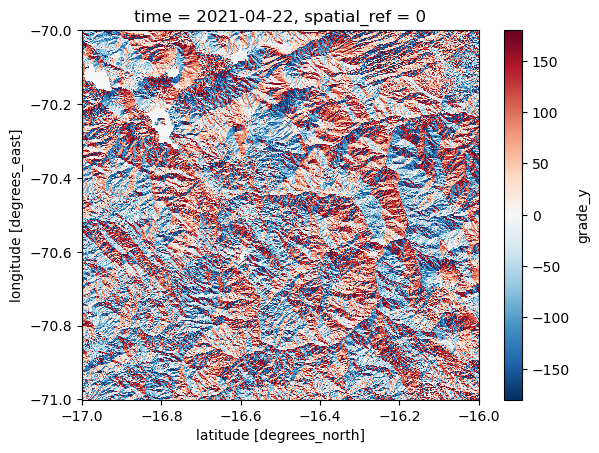

In [118]:
asps.plot.imshow()

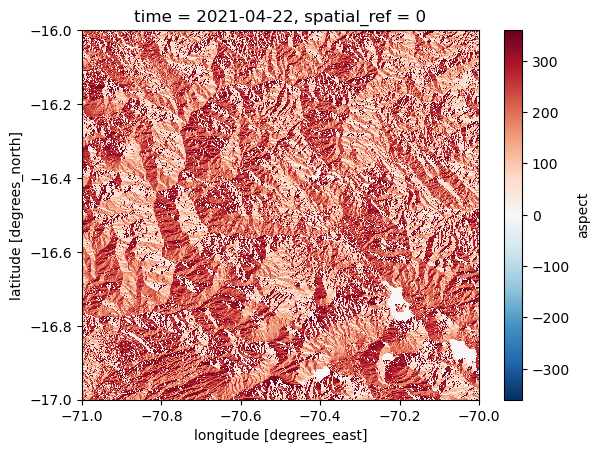

In [119]:
asset.aspect.plot.imshow()

In [94]:
grad_x, grad_y = np.gradient(asset['data'].squeeze())

In [128]:
grad_x

array([[        nan, -0.39746094, -0.4975586 , ...,  0.48242188,
         0.11816406, -0.12182617],
       [        nan, -0.40185547, -0.560791  , ...,  0.19006348,
         0.05688477,  0.24291992],
       [        nan, -0.52001953, -0.36645508, ...,  0.15356445,
         0.28808594,  0.35290527],
       ...,
       [        nan, -6.270996  , -1.6347656 , ...,  1.7280273 ,
         1.7150879 ,  1.4863281 ],
       [        nan, 12.455688  , 11.584961  , ...,  1.560791  ,
         1.6464844 ,  1.4719238 ],
       [        nan, 20.447754  , 15.706787  , ...,  1.5449219 ,
         1.5117188 ,  1.5429688 ]], dtype=float32)

In [129]:
grad_y

array([[        nan,         nan, -0.39697266, ...,  0.04382324,
         0.11865234, -0.04931641],
       [        nan,         nan, -0.17895508, ..., -0.01306152,
        -0.18347168, -0.28930664],
       [        nan,         nan, -0.26464844, ..., -0.03210449,
         0.17150879,  0.3227539 ],
       ...,
       [        nan,         nan,  4.487671  , ..., -1.595459  ,
        -1.5117188 , -1.4599609 ],
       [        nan,         nan,  7.1898193 , ..., -1.5283203 ,
        -1.5996094 , -1.840332  ],
       [        nan,         nan,  1.4855957 , ..., -1.4899902 ,
        -1.6005859 , -1.809082  ]], dtype=float32)

In [130]:
np.sqrt(1.54**2 + 1.8**2)

2.3688815926508444

In [127]:
asset.absolute_grade

<xarray.DataArray 'absolute_grade' (lon: 3601, lat: 3601)>
array([[        nan,         nan,  0.6365154 , ...,  0.48440823,
         0.16745484,  0.13142954],
       [        nan,         nan,  0.58865225, ...,  0.19051175,
         0.19208783,  0.37776768],
       [        nan,         nan,  0.4520267 , ...,  0.15688448,
         0.33527416,  0.47823867],
       ...,
       [        nan,         nan,  4.776154  , ...,  2.3519285 ,
         2.286224  ,  2.0834243 ],
       [        nan,         nan, 13.634691  , ...,  2.1844523 ,
         2.2955742 ,  2.3565614 ],
       [        nan,         nan, 15.776887  , ...,  2.1463585 ,
         2.2016287 ,  2.3777153 ]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
  * lat          (lat) float64 -16.0 -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

In [99]:
asset['grad_x'] = grad_x

MissingDimensionsError: cannot set variable 'grad_x' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [102]:
asset = add_aspect(asset)

In [103]:
grad_x_xr = xr.DataArray(grad_x, dims=("lat", "lon"), coords={"lat": lat, "lon": lon}, name="grade_x")

# Load an existing xarray

NameError: name 'lat' is not defined

In [136]:
slps = xrspatial.slope(asset.data)

In [139]:
slps.min()

<xarray.DataArray 'slope' ()>
array(0.)
Coordinates:
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0

In [143]:
slps.mean

<bound method DataArrayReductions.mean of <xarray.DataArray 'slope' (lat: 3601, lon: 3601)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan, 89.96914 , ..., 89.88831 , 89.8847  ,
              nan],
       [      nan,       nan, 89.96418 , ..., 89.90519 , 89.941956,
              nan],
       ...,
       [      nan,       nan, 89.99411 , ..., 89.99315 , 89.99288 ,
              nan],
       [      nan,       nan, 89.99871 , ..., 89.99277 , 89.992874,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
  * lat          (lat) float64 -16.0 -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38>

In [141]:
asset.data

<xarray.DataArray 'data' (lat: 3601, lon: 3601)>
array([[      nan, 4546.1523, 4545.85  , ..., 3894.349 , 3894.6357,
        3894.5864],
       [      nan, 4545.755 , 4545.3525, ..., 3894.8315, 3894.754 ,
        3894.4646],
       [      nan, 4545.3486, 4544.7285, ..., 3894.7292, 3894.7495,
        3895.0723],
       ...,
       [      nan, 2562.2283, 2564.085 , ..., 4545.3994, 4543.836 ,
        4542.376 ],
       [      nan, 2566.692 , 2571.548 , ..., 4546.976 , 4545.617 ,
        4543.777 ],
       [      nan, 2587.1396, 2587.255 , ..., 4548.521 , 4547.129 ,
        4545.32  ]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -71.0 -71.0 -71.0 -71.0 ... -70.0 -70.0 -70.0
  * lat          (lat) float64 -16.0 -16.0 -16.0 -16.0 ... -17.0 -17.0 -17.0
    time         datetime64[ns] 2021-04-22
    spatial_ref  int64 0
Attributes:
    _FillValue:  3.402823466e+38